In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
db = pd.read_csv("C:/Users/thale/Desktop/Faculdade_e_Trabalho/IC/IC2019/itaCovid-19.csv")

In [3]:
db

,covid1,covid2,covid3,covid4,covid5,covid6,Y
0,3,3,3,3,17,79,132
1,3,3,3,17,79,132,229
2,3,3,17,79,132,229,322
3,3,17,79,132,229,322,400
4,17,79,132,229,322,400,650
5,79,132,229,322,400,650,888
6,132,229,322,400,650,888,1128
7,229,322,400,650,888,1128,1689
8,322,400,650,888,1128,1689,1835
9,400,650,888,1128,1689,1835,2502


In [4]:
log = lambda x: math.log2(x)
deslog = lambda x: 2**x
y=db["Y"]
y=y.apply(log)
X=db.drop('Y', axis=1)
X=X.applymap(log)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print("Training MLPRegressor...") #20, 50, 100, 150
reg = MLPRegressor(hidden_layer_sizes =(6,8,6 ),solver='adam',activation = 'relu',learning_rate='adaptive',learning_rate_init = 0.1,max_iter=10000, shuffle = False)
reg.fit(X_train,y_train)


Training MLPRegressor...


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(6, 8, 6), learning_rate='adaptive',
             learning_rate_init=0.1, max_iter=10000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=False, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

teste de overfiting
Mean squared error: 35563120.30
Variance score: 0.96


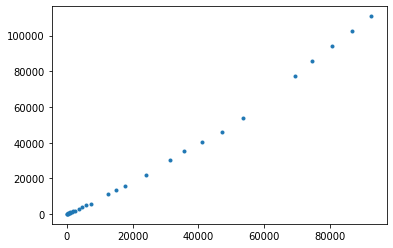

In [5]:
y_predict_train = reg.predict(X_train)
print("teste de overfiting")
y_train= deslog(y_train)
y_predict_train= deslog(y_predict_train)
print("Mean squared error: %.2f"
      % mean_squared_error(y_train, y_predict_train))
print('Variance score: %.2f' % r2_score(y_train, y_predict_train))
plt.scatter(y_train,y_predict_train,marker='.')
plt.show()


Resultados
Mean squared error: 5792347.40
Variance score: 0.99


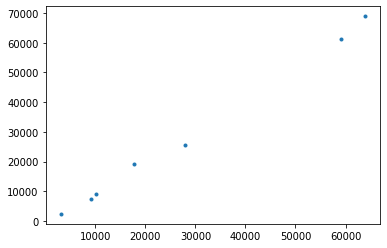

In [6]:
y_predict= reg.predict(X_test)
print("Resultados")
y_test= deslog(y_test)
y_predict= deslog(y_predict)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_predict))
print('Variance score: %.2f' % r2_score(y_test, y_predict))
plt.scatter(y_test,y_predict,marker='.')
plt.show()

In [7]:
dbSp = pd.read_csv("C:/Users/thale/Desktop/Faculdade_e_Trabalho/IC/IC2019/SpaCovid-19.csv")
dbSp

,covid1,covid2,covid3,covid4,covid5,covid6,Y
0,2,2,2,2,2,2,3
1,2,2,2,2,2,3,7
2,2,2,2,2,3,7,12
3,2,2,2,3,7,12,25
4,2,2,3,7,12,25,34
5,2,3,7,12,25,34,66
6,3,7,12,25,34,66,83
7,7,12,25,34,66,83,114
8,12,25,34,66,83,114,151
9,25,34,66,83,114,151,200


In [8]:
ysp=dbSp["Y"];
ysp=ysp.apply(log)
Xsp=dbSp.drop('Y', axis=1)
Xsp=Xsp.applymap(log)
X_trainsp, X_testsp, y_trainsp, y_testsp = train_test_split(Xsp, ysp, test_size = 0.2, random_state = 0)
print("Training MLPRegressor...")
reg.fit(X_trainsp,y_trainsp)

Training MLPRegressor...


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(6, 8, 6), learning_rate='adaptive',
             learning_rate_init=0.1, max_iter=10000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=False, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

teste de overfiting
Mean squared error: 555639742.94
Variance score: -0.34


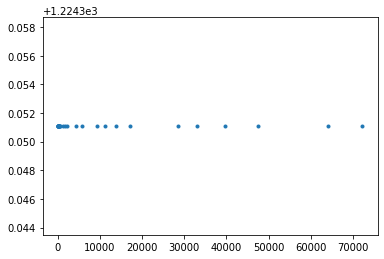

In [9]:
y_predict_trainsp = reg.predict(X_trainsp)
print("teste de overfiting")
y_trainsp= deslog(y_trainsp)
y_predict_trainsp= deslog(y_predict_trainsp)
print("Mean squared error: %.2f"
      % mean_squared_error(y_trainsp, y_predict_trainsp))
print('Variance score: %.2f' % r2_score(y_trainsp, y_predict_trainsp))
plt.scatter(y_trainsp,y_predict_trainsp,marker='.')
plt.show()

Resultados
Mean squared error: 568932646.93
Variance score: -0.63


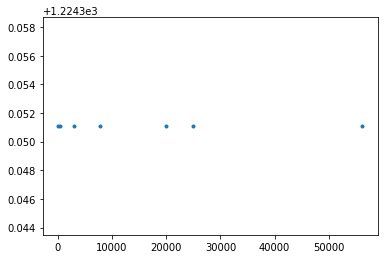

In [10]:
y_predictsp= reg.predict(X_testsp)
print("Resultados")
y_testsp= deslog(y_testsp)
y_predictsp= deslog(y_predictsp)
print("Mean squared error: %.2f"
      % mean_squared_error(y_testsp, y_predictsp))
print('Variance score: %.2f' % r2_score(y_testsp, y_predictsp))
plt.scatter(y_testsp,y_predictsp,marker='.')
plt.show()

In [11]:
dbBr = pd.read_csv("C:/Users/thale/Desktop/Faculdade_e_Trabalho/IC/IC2019/Covid-19.csv")
xBr = dbBr.drop('Y', axis=1)
xBr= xBr.applymap(log)
yBr = dbBr['Y']
yBr= yBr.apply(log)

In [12]:
YbrPred = reg.predict(xBr)
print("Resultados")
print("Mean squared error: %.2f"
      % mean_squared_error(yBr, YbrPred))
print('Variance score: %.2f' % r2_score(yBr, YbrPred))
yBr = deslog(yBr)
YbrPred=deslog(YbrPred)
plt.scatter(yBr, YbrPred,marker='.')
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').